In [9]:
import numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
from collections import Counter
from typing import List



def chain_builder_NL(N, rho, n):
    """
    having chain be a numpy array that the first column is the ferminonic number of the pair and the second column 
    is the Majorana operator which can be assigned randomly at contact to simulate quantum randomness.
    third column is the pair index
    """
    if N % 2 != 0:
        raise ValueError("N must be even for a Majorana chain.")
    chain = np.empty((N * rho, 3, n), dtype=object)
    for j in range (n):
        for i in range(N):
            chain[i * rho][0][j] = 1 # initially all pairs have fermion number 1
            chain[i * rho][1][j] = True
            chain[i * rho][2][j] = int(i/2) # index for pair (i,j), where i<j, using i to denote the Majorana j is paired with.
    return chain

def hopping_annihilate_NL(chain, p):
    N = chain.shape[0]  # Number of sites in the chain
    H = chain.shape[2]
    density = []
    for a in range(H):
        index_a = np.where(chain[:,1, a]==True)[0] # get the index of Majorana operators
        for _ in range(len(index_a)):
            i = random.choice(index_a)
            hop_direction_a = random.choice([-1, 1])
            if  chain[:, 2, :].tolist().count(None) == H * N: #if all sites are empty

                return chain, np.zeros(H, dtype=int)
            
            if chain[i][0][a] == None: #if the site is empty
                pass

            elif chain[(i+hop_direction_a) % N][0][a] == None: #if the site to arrive is empty
                
                r = random.random()
                if r < p:
                    if hop_direction_a <0 and chain[(i+hop_direction_a) % N ][2][(a+1)%H] != None: #if the site is empty
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, a] == chain[i][2][a])[0]
                        pair_j = np.where(chain[:, 2, (a+1)%H] == chain[(i+hop_direction_a) % N][2][(a+1)%H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != (i+hop_direction_a)%N][0]
                        
                        if partner_j == None:
                            raise ValueError("Partner Majorana is None, check the chain structure.")
                        # flip the fermionic parity
                        chain[i][0][a] = (chain[i][0][a] +1 ) % 2
                        chain[partner_i][0][a] = (chain[partner_i][0][a] + 1) % 2
                        chain[(i+hop_direction_a) % N][0][(a+1)%H] = (chain[(i+hop_direction_a) % N][0][(a+1)%H]+ 1) % 2
                        chain[partner_j][0][(a+1)%H] = (chain[partner_j][0][(a+1)%H]+ 1) % 2

                    elif hop_direction_a >0 and chain[i][2][(a+1)%H] != None:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, a] == chain[i][2][a])[0]
                        pair_j = np.where(chain[:, 2, (a+1)%H] == chain[i][2][(a+1)%H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != i][0]

                        # flip the fermionic parity
                        chain[i][0][a] = (chain[i][0][a] +1 ) % 2
                        chain[partner_i][0][a] = (chain[partner_i][0][a] + 1) % 2
                        chain[i][0][(a+1)%H] = (chain[i][0][(a+1)%H]+ 1) % 2
                        chain[partner_j][0][(a+1)%H] = (chain[partner_j][0][(a+1)%H]+ 1) % 2

                chain[(i+hop_direction_a) % N][0][a] = chain[i][0][a]
                chain[i][0][a] = None
                chain[(i+hop_direction_a) % N][1][a] = chain[i][1][a]
                chain[i][1][a] = None
                chain[(i+hop_direction_a) % N][2][a] = chain[i][2][a]
                chain[i][2][a] = None

            elif chain[(i+hop_direction_a) % N][2][a] == chain[i][2][a]:  #if paired under periodic boundary condition

                r = random.random()
                if r < p:
                    if hop_direction_a <0 and chain[(i+hop_direction_a) % N ][2][(a+1)%H] != None: #if the site is empty
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, a] == chain[i][2][a])[0]
                        pair_j = np.where(chain[:, 2, (a+1)%H] == chain[(i+hop_direction_a) % N][2][(a+1)%H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != (i+hop_direction_a)%N][0]

                        # flip the fermionic parity
                        chain[i][0][a] = (chain[i][0][a] +1 ) % 2
                        chain[partner_i][0][a] = (chain[partner_i][0][a] + 1) % 2
                        chain[(i+hop_direction_a) % N][0][(a+1)%H] = (chain[(i+hop_direction_a) % N][0][(a+1)%H]+ 1) % 2
                        chain[partner_j][0][(a+1)%H] = (chain[partner_j][0][(a+1)%H]+ 1) % 2

                    elif hop_direction_a >0 and chain[i][2][(a+1)%H] != None:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, a] == chain[i][2][a])[0]
                        pair_j = np.where(chain[:, 2, (a+1)%H] == chain[i][2][(a+1)%H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != i][0]

                        # flip the fermionic parity
                        chain[i][0][a] = (chain[i][0][a] +1 ) % 2
                        chain[partner_i][0][a] = (chain[partner_i][0][a] + 1) % 2
                        chain[i][0][(a+1)%H] = (chain[i][0][(a+1)%H]+ 1) % 2
                        chain[partner_j][0][(a+1)%H] = (chain[partner_j][0][(a+1)%H]+ 1) % 2

                if chain[i][0][a] == 0 and chain[(i+hop_direction_a) % N][0][a] == 0:
                    
                    chain[i][0][a] = None
                    chain[(i+hop_direction_a) % N][0][a] = None
                    chain[i][1][a] = None
                    chain[(i+hop_direction_a) % N][1][a] = None
                    chain[i][2][a] = None
                    chain[(i+hop_direction_a) % N][2][a] = None
                
                
            
            elif chain[i][2][a] !=  chain[(i+hop_direction_a) % N][2][a] :


                # get the index of paired Majorana
                rows_i = np.where(chain[:, 2, a] == chain[i][2][a])[0]

                if len(rows_i) == 0:
                    raise ValueError("No paired Majorana found for site i.")
                
                rows = np.where(chain[:, 2, a] == chain[(i+hop_direction_a) % N][2][a])[0]
                outside_index_i = [x for x in rows_i if x != i][0]
                outside_index = [x for x in rows if x != (i+hop_direction_a)%N][0]
                n_sum = chain[i][0][a] + chain[(i+hop_direction_a) % N][0][a]
                ferminon_number = random.choice([0, 1])
                chain[i][0][a] = ferminon_number
                chain[(i+hop_direction_a) % N][0][a] = ferminon_number

                # braiding
                r = random.random()
                if r < p:
                    if hop_direction_a <0 and chain[(i+hop_direction_a) % N ][2][(a+1)%H] != None: #if the site is empty
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, a] == chain[i][2][a])[0]
                        pair_j = np.where(chain[:, 2, (a+1)%H] == chain[(i+hop_direction_a) % N][2][(a+1)%H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != (i+hop_direction_a)%N][0]

                        # flip the fermionic parity
                        chain[i][0][a] = (chain[i][0][a] +1 ) % 2
                        chain[partner_i][0][a] = (chain[partner_i][0][a] + 1) % 2
                        chain[(i+hop_direction_a) % N][0][(a+1)%H] = (chain[(i+hop_direction_a) % N][0][(a+1)%H]+ 1) % 2
                        chain[partner_j][0][(a+1)%H] = (chain[partner_j][0][(a+1)%H]+ 1) % 2

                    elif hop_direction_a >0 and chain[i][2][(a+1)%H] != None:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, a] == chain[i][2][a])[0]
                        pair_j = np.where(chain[:, 2, (a+1)%H] == chain[i][2][(a+1)%H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != i][0]

                        # flip the fermionic parity
                        chain[i][0][a] = (chain[i][0][a] +1 ) % 2
                        chain[partner_i][0][a] = (chain[partner_i][0][a] + 1) % 2
                        chain[i][0][(a+1)%H] = (chain[i][0][(a+1)%H]+ 1) % 2
                        chain[partner_j][0][(a+1)%H] = (chain[partner_j][0][(a+1)%H]+ 1) % 2

                pair_index = chain[(i+hop_direction_a) % N][2][a]
                pair_index_i = chain[i][2][a]
                min_index = min(pair_index, pair_index_i)
                max_index = max(pair_index, pair_index_i)

                if chain[i][0][a] == 0 and chain[(i+hop_direction_a) % N][0][a] == 0:
                    # annihilate the collided pair
                    chain[i][0][a] = None
                    chain[i][1][a] = None
                    chain[i][2][a] = None
                    chain[(i+hop_direction_a) % N][0][a] = None
                    chain[(i+hop_direction_a) % N][1][a] = None
                    chain[(i+hop_direction_a) % N][2][a] = None

                    # update the partner pair
                    chain[outside_index_i][0][a] = n_sum % 2
                    chain[outside_index_i][1][a] = True
                    chain[outside_index_i][2][a] = min_index
                    chain[outside_index][0][a] = n_sum % 2
                    chain[outside_index][1][a] = True
                    chain[outside_index][2][a] = min_index

            

                elif chain[i][0][a] == 1 and chain[(i+hop_direction_a) % N][0][a] == 1:
                    # calculate the ferminon number of new arcs
                    chain[outside_index_i][0][a] = (n_sum -1) % 2
                    chain[outside_index][0][a] = (n_sum -1) % 2
                    

                    if  i == min(i, (i+hop_direction_a) % N, outside_index_i, outside_index) or (i+hop_direction_a) % N == min(i, (i+hop_direction_a) % N, outside_index_i, outside_index):
                        chain[i][2][a] = min_index
                        chain[(i+hop_direction_a) % N][2][a] = min_index
                        chain[outside_index_i][2][a] = max_index
                        chain[outside_index][2][a] = max_index
                    else:
                        chain[i][2][a] = max_index
                        chain[(i+hop_direction_a) % N][2][a] = max_index
                        chain[outside_index_i][2][a] = min_index
                        chain[outside_index][2][a] = min_index

                    
        """
        index1 = np.where(chain[:,1, ]==True)[0] # get the index of Majorana operators
        for _ in range(len(index1)):
            j = random.choice(index1)
            hop_direction1 = random.choice([-1, 1])
            if  chain[:, 2, 1].tolist().count(None) == N: #if all sites are empty

                return chain, 0, 0
            
            if chain[j][0][1] == None: #if the site is empty
                pass

            elif chain[(j+hop_direction1) % N][0][1] == None: #if the site to arrive is empty

                q = random.random()
                if q < p:
                    if hop_direction1 >0 and chain[(j+hop_direction1) % N ][2][0] != None: #if the site is empty
                        # get the index of paired Majorana
                        pair_j = np.where(chain[:, 2, 1] == chain[j][2][1])[0]
                        pair_i = np.where(chain[:, 2, 0] == chain[(j+hop_direction1) % N][2][0])[0]
                        partner_j = [x for x in pair_j if x != j][0]
                        partner_i = [x for x in pair_i if x != (j+hop_direction1)%N][0]

                        # flip the fermionic parity
                        chain[(j+hop_direction1) % N][0][0] = (chain[(j+hop_direction1) % N][0][0] +1 ) % 2
                        chain[partner_i][0][0] = (chain[partner_i][0][0] + 1) % 2
                        chain[j][0][1] = (chain[j][0][1]+ 1) % 2
                        chain[partner_j][0][1] = (chain[partner_j][0][1]+ 1) % 2

                    elif hop_direction1 <0 and chain[j][2][0] != None:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, 0] == chain[j][2][0])[0]
                        pair_j = np.where(chain[:, 2, 1] == chain[j][2][1])[0]
                        partner_i = [x for x in pair_i if x != j][0]
                        partner_j = [x for x in pair_j if x != j][0]

                        # flip the fermionic parity
                        chain[j][0][0] = (chain[j][0][0] +1 ) % 2
                        chain[partner_i][0][0] = (chain[partner_i][0][0] + 1) % 2
                        chain[j][0][1] = (chain[j][0][1]+ 1) % 2
                        chain[partner_j][0][1] = (chain[partner_j][0][1]+ 1) % 2

                chain[(j+hop_direction1) % N][0][1] = chain[j][0][1]
                chain[j][0][1] = None
                chain[(j+hop_direction1) % N][1][1] = chain[j][1][1]
                chain[j][1][1] = None
                chain[(j+hop_direction1) % N][2][1] = chain[j][2][1]
                chain[j][2][1] = None
                
            elif chain[(j+hop_direction1) % N][2][1] == chain[j][2][1]:  #if paired under periodic boundary condition

                q = random.random()
                if q < p:
                    if hop_direction1 >0 and chain[(j+hop_direction1) % N ][2][0] != None: #if the site is empty
                        # get the index of paired Majorana
                        pair_j = np.where(chain[:, 2, 1] == chain[j][2][1])[0]
                        pair_i = np.where(chain[:, 2, 0] == chain[(j+hop_direction1) % N][2][0])[0]
                        partner_j = [x for x in pair_j if x != j][0]
                        partner_i = [x for x in pair_i if x != (j+hop_direction1)%N][0]

                        # flip the fermionic parity
                        chain[(j+hop_direction1) % N][0][0] = (chain[(j+hop_direction1) % N][0][0] +1 ) % 2
                        chain[partner_i][0][0] = (chain[partner_i][0][0] + 1) % 2
                        chain[j][0][1] = (chain[j][0][1]+ 1) % 2
                        chain[partner_j][0][1] = (chain[partner_j][0][1]+ 1) % 2

                    elif hop_direction1 <0 and chain[j][2][0] != None:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, 0] == chain[j][2][0])[0]
                        pair_j = np.where(chain[:, 2, 1] == chain[j][2][1])[0]
                        partner_i = [x for x in pair_i if x != j][0]
                        partner_j = [x for x in pair_j if x != j][0]

                        # flip the fermionic parity
                        chain[j][0][0] = (chain[j][0][0] +1 ) % 2
                        chain[partner_i][0][0] = (chain[partner_i][0][0] + 1) % 2
                        chain[j][0][1] = (chain[j][0][1]+ 1) % 2
                        chain[partner_j][0][1] = (chain[partner_j][0][1]+ 1) % 2

                if chain[j][0][1] == 0 and chain[(j+hop_direction1) % N][0][1] == 0:       
                    chain[j][0][1] = None
                    chain[(j+hop_direction1) % N][0][1] = None
                    chain[j][1][1] = None
                    chain[(j+hop_direction1) % N][1][1] = None
                    chain[j][2][1] = None
                    chain[(j+hop_direction1) % N][2][1] = None


            
            elif chain[j][2][1] !=  chain[(j+hop_direction1) % N][2][1]:

            
                # get the index of paired Majorana
                rows_j = np.where(chain[:, 2, 1] == chain[j][2][1])[0]
                rows = np.where(chain[:, 2, 1] == chain[(j+hop_direction1) % N][2][1])[0]
                outside_index_j = [x for x in rows_j if x != j][0]
                outside_index = [x for x in rows if x != (j+hop_direction1)%N][0]
                n_sum1 = chain[j][0][1] + chain[(j+hop_direction1) % N][0][1]
                ferminon_number1 = random.choice([0, 1])
                chain[j][0][1] = ferminon_number1
                chain[(j+hop_direction1) % N][0][1] = ferminon_number1

                # braiding
                q = random.random()
                if q < p:
                    if hop_direction1 >0 and chain[(j+hop_direction1) % N ][2][0] != None: #if the site is empty
                        # get the index of paired Majorana
                        pair_j = np.where(chain[:, 2, 1] == chain[j][2][1])[0]
                        pair_i = np.where(chain[:, 2, 0] == chain[(j+hop_direction1) % N][2][0])[0]
                        partner_j = [x for x in pair_j if x != j][0]
                        partner_i = [x for x in pair_i if x != (j+hop_direction1)%N][0]

                        # flip the fermionic parity
                        chain[(j+hop_direction1) % N][0][0] = (chain[(j+hop_direction1) % N][0][0] +1 ) % 2
                        chain[partner_i][0][0] = (chain[partner_i][0][0] + 1) % 2
                        chain[j][0][1] = (chain[j][0][1]+ 1) % 2
                        chain[partner_j][0][1] = (chain[partner_j][0][1]+ 1) % 2

                    elif hop_direction1 <0 and chain[j][2][0] != None:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, 0] == chain[j][2][0])[0]
                        pair_j = np.where(chain[:, 2, 1] == chain[j][2][1])[0]
                        partner_i = [x for x in pair_i if x != j][0]
                        partner_j = [x for x in pair_j if x != j][0]

                        # flip the fermionic parity
                        chain[j][0][0] = (chain[j][0][0] +1 ) % 2
                        chain[partner_i][0][0] = (chain[partner_i][0][0] + 1) % 2
                        chain[j][0][1] = (chain[j][0][1]+ 1) % 2
                        chain[partner_j][0][1] = (chain[partner_j][0][1]+ 1) % 2

                pair_index1 = chain[(j+hop_direction1) % N][2][1]
                pair_index_j = chain[j][2][1]
                min_index = min(pair_index1, pair_index_j)
                max_index = max(pair_index1, pair_index_j)

                if chain[j][0][1] == 0 and chain[(j+hop_direction1) % N][0][1] == 0:
                    chain[j][0][1] = None
                    chain[j][1][1] = None
                    chain[j][2][1] = None
                    chain[(j+hop_direction1) % N][0][1] = None
                    chain[(j+hop_direction1) % N][1][1] = None
                    chain[(j+hop_direction1) % N][2][1] = None


                    chain[outside_index_j][0][1] = n_sum1 % 2
                    chain[outside_index_j][1][1] = True
                    chain[outside_index_j][2][1] = min_index
                    chain[outside_index][0][1] = n_sum1 % 2
                    chain[outside_index][1][1] = True
                    chain[outside_index][2][1] = min_index

                # calculate the ferminon number of new arcs
                if chain[j][0][1] == 1 and chain[(j+hop_direction1) % N][0][1] == 1:
                    
                    #update the parity
                    chain[outside_index_j][0][1] = (n_sum1-1) % 2 # conservation of ferminon number
                    chain[outside_index][0][1] = (n_sum1-1) % 2

                    # update the pairing index
                    
                    if  j == min(j, (j+hop_direction1) % N, outside_index_j, outside_index) or (j+hop_direction1) % N == min(j, (j+hop_direction1) % N, outside_index_j, outside_index):
                        chain[j][2][1] = min_index
                        chain[(j+hop_direction1) % N][2][1] = min_index
                        chain[outside_index_j][2][1] = max_index
                        chain[outside_index][2][1] = max_index
                    else:
                        chain[j][2][1] = max_index
                        chain[(j+hop_direction1) % N][2][1] = max_index
                        chain[outside_index_j][2][1] = min_index
                        chain[outside_index][2][1] = min_index
             """       
        density_a = N - chain[:,2,a].tolist().count(None) # Count the number of empty sites
        density.append(density_a)
    # density1 = N - chain[:,2,1].tolist().count(None) # Count the number of empty sites
    # density = [density0, density1]
    return chain, density


def evolution_annihilate_NL(chain, t, p):
    """
    Simulates the evolution of the Majorana chain over time t.
    The function modifies the chain in place.
    """
    H = chain.shape[2]
    density_hist = np.zeros((t, H), dtype=int)  # Initialize density array for two Majorana operators
    times = [k for k in range(t)]
    for k in range(t):
        
        chain, density= hopping_annihilate_NL(chain, p)
        density_hist[k, :] = density.copy()
    return times, density_hist
    

def calculate_pair_distances(chain):
    """
    Computes the arc length of Majorana pairs
    
    Returns:
      pair_data: a list of tuples (pair_index, distance)
      distance_counts: a dictionary mapping distance -> count of pairs with that distance
    """
    pair_positions = {}
    # Loop over each row in the chain and record its index based on its pairing index (third column)
    for i, row in enumerate(chain):
        pair_idx = row[2]
        if pair_idx is None:
            pass
        if pair_idx in pair_positions:
            pair_positions[pair_idx].append(i)
        else:
            pair_positions[pair_idx] = [i]
    
    pair_data = []    
    distance_counts = {} 
    
    for pair_idx, positions in pair_positions.items():
        if len(positions) == 2:
            d = abs(positions[1] - positions[0])
            pair_data.append((pair_idx, d))
            distance_counts[d] = distance_counts.get(d, 0) + 1
        else:
            # If there are not exactly two entries for a pair index, issue a warning.
            print(f"Warning: Pair index {pair_idx} appears {len(positions)} times (expected 2).")
    
    return pair_data, distance_counts
     

def S_A(chain, R):
    """
    Count “whole” and “half” pairs in lst[start:end].

    - If both occurrences of a value fall inside [start,end), it contributes 1.
    - If exactly one occurrence falls inside, it contributes 0.5.
    """
    S_A_ = 0.0
    start = (len(chain)-R)//2
    end = start + R -1
    window = chain[start:end,2]
    cnt = Counter(window)
    S_A_ = sum(min(c, 2) * 0.5 for c in cnt.values())
    return S_A_



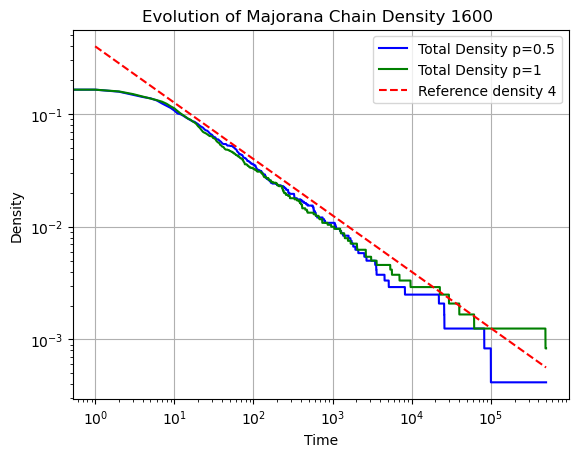

In [15]:
chain1_NL = chain_builder_NL(400, 4, 3)
times1_NL, density1_NL = evolution_annihilate_NL(chain1_NL, 500000, 1)
chain2_NL = chain_builder_NL(400, 4, 3)
times2_NL, density2_NL = evolution_annihilate_NL(chain2_NL, 500000, 0.25)
chain3_NL = chain_builder_NL(400, 4, 3)
times3_NL, density3_NL = evolution_annihilate_NL(chain3_NL, 500000, 0.75)
chain4_NL = chain_builder_NL(400, 4, 3)
times4_NL, density4_NL = evolution_annihilate_NL(chain4_NL, 500000, 0)

# Plotting the density evolution
density_ref_4 = 2/(math.sqrt(8 * math.pi) * np.sqrt(times1_NL[1:])) 

plt.plot(times1_NL, (density1_NL[:, 1]+ density1_NL[:, 0])/4800, label='Total Density p=1', color='blue')
plt.plot(times2_NL, (density2_NL[:, 1]+ density2_NL[:, 0])/4800, label='Total Density p=0.25', color='green')
plt.plot(times3_NL, (density3_NL[:, 1]+ density3_NL[:, 0])/4800, label='Total Density p=0.75', color='orange')
plt.plot(times4_NL, (density4_NL[:, 1]+ density4_NL[:, 0])/4800, label='Total Density p=0', color='purple')
plt.plot(times1_NL[1:], density_ref_4, label='Reference density 4', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.title(f'Evolution of Majorana Chain Density {len(chain1_NL)} ')
# plt.xlim(0,6)
plt.legend()
plt.grid()
plt.show()

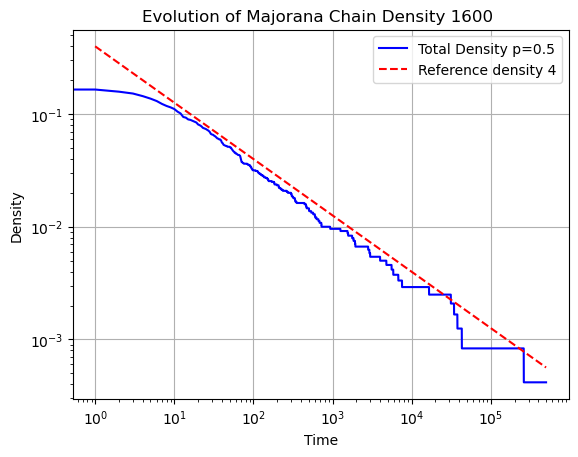

In [13]:
density_ref_4 = 2/(math.sqrt(8 * math.pi) * np.sqrt(times1[1:])) 
plt.plot(times1, (density1[:, 1]+ density1[:, 0])/4800, label='Total Density p=0.5', color='blue')
plt.plot(times1[1:], density_ref_4, label='Reference density 4', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.title(f'Evolution of Majorana Chain Density {len(chain1)} ')
# plt.xlim(0,6)
plt.legend()
plt.grid()
plt.show()